In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the feature-engineered dataset
data = pd.read_csv('/Users/parsabahrami/Customer Churn Model/data/featured_data.csv')

# Define features and target variable
X = data.drop(columns=['Exited'])
y = data['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.8280859570214892
Confusion Matrix:
 [[1542   57]
 [ 287  115]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      1599
           1       0.67      0.29      0.40       402

    accuracy                           0.83      2001
   macro avg       0.76      0.63      0.65      2001
weighted avg       0.81      0.83      0.80      2001



In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the feature-engineered dataset
data = pd.read_csv('/Users/parsabahrami/Customer Churn Model/data/featured_data.csv')

# Define features and target variable
X = data.drop(columns=['Exited'])
y = data['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.8685657171414293
Confusion Matrix:
 [[1534   65]
 [ 198  204]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1599
           1       0.76      0.51      0.61       402

    accuracy                           0.87      2001
   macro avg       0.82      0.73      0.76      2001
weighted avg       0.86      0.87      0.86      2001



In [6]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model for prediction
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluate the best model
print(f"Accuracy: {accuracy_score(y_test, y_pred_best)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.7s
[

In [7]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the feature-engineered dataset
data = pd.read_csv('/Users/parsabahrami/Customer Churn Model/data/featured_data.csv')

# Define features and target variable
X = data.drop(columns=['Exited'])
y = data['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data (necessary for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up the hyperparameters for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],           # Different values of k
    'weights': ['uniform', 'distance'],        # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=1, n_jobs=-1)

# Train the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# Predict on the test set using the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Accuracy: 0.841079460269865
Confusion Matrix:
 [[1537   62]
 [ 256  146]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1599
           1       0.70      0.36      0.48       402

    accuracy                           0.84      2001
   macro avg       0.78      0.66      0.69      2001
weighted avg       0.83      0.84      0.82      2001



In [8]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load the feature-engineered dataset
data = pd.read_csv('/Users/parsabahrami/Customer Churn Model/data/featured_data.csv')

# Define features and target variable
X = data.drop(columns=['Exited'])
y = data['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define hyperparameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and print them
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Use the best model to make predictions
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
joblib.dump(xgb, 'xgboost_churn_model.pkl')


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1; total time=   1.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.1s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   1.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsamp

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   0.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=   1.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.1s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsa

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1; total time=   1.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1; total time=   1.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1; total time=   1.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1; total time=   1.5s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1; total time=   1.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1; total time=   0.9s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1; total time=   0.9s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1; total time=   0.9s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1; total time=   0.9s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1; total time=   0.9s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1; total time=   0.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1; total time=   0.7s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1; total time=   1.2s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1; total time=   1.5s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   2.9s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   2.9s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   3.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   2.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1; total time=   2.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1; total time=   0.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.1s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   0.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   0.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1; total time=   0.7s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1; total time=   0.7s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=   1.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=   1.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=   1.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=   1.1s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1; total time=   1.9s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1; total time=   1.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1; total time=   1.6s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1; total time=   1.6s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1; total time

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1; total time=   1.5s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1; total time=   0.7s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1; total time=   0.9s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1; total time=   0.9s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1; total time=   1.2s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1; total time=   0.9s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1; total time=   0.7s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.0s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1; total time=   1.1s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1; total time=   1.2s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1; total time=   1.1s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.8s


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1; total time=   1.6s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1; total time=   1.6s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1; total time=   1.5s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1; total time=   0.9s
[CV] END colsample_bytree=1, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1; total time=   0.8s
Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:15:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [13]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load the feature-engineered dataset
data = pd.read_csv('/Users/parsabahrami/Customer Churn Model/data/featured_data.csv')

# Define features and target variable
X = data.drop(columns=['Exited'])
y = data['Exited']

# Split the data into training and testing sets (not needed for cross-validation, but can use this as a final test set later)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data (you'll do this for the entire dataset for cross-validation)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the XGBoost model with the best hyperparameters from GridSearch
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                    n_estimators=100, 
                    max_depth=5, 
                    learning_rate=0.1, 
                    subsample=1, 
                    colsample_bytree=0.8)

# Define the scoring metrics (you can choose one or more)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1': make_scorer(f1_score, pos_label=1)
}

# Perform cross-validation (5-fold cross-validation in this example)
scores = cross_val_score(xgb, X_scaled, y, cv=5, scoring='accuracy')  # You can replace 'accuracy' with precision, recall, or f1
print(f"Cross-validation accuracy scores: {scores}")
print(f"Mean cross-validation accuracy: {np.mean(scores)}")

# Perform cross-validation for multiple metrics
from sklearn.model_selection import cross_validate

multi_metric_scores = cross_validate(xgb, X_scaled, y, cv=5, scoring=scoring)

# Show cross-validation results
print(f"Cross-validation accuracy: {np.mean(multi_metric_scores['test_accuracy'])}")
print(f"Cross-validation precision: {np.mean(multi_metric_scores['test_precision'])}")
print(f"Cross-validation recall: {np.mean(multi_metric_scores['test_recall'])}")
print(f"Cross-validation F1-score: {np.mean(multi_metric_scores['test_f1'])}")


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:25:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:25:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:25:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:25:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

Cross-validation accuracy scores: [0.86406797 0.86856572 0.858      0.871      0.8505    ]
Mean cross-validation accuracy: 0.8624267366316841


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:25:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:25:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:25:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [17:25:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1727237108208/work/src/learner.cc:

Cross-validation accuracy: 0.8624267366316841
Cross-validation precision: 0.7607467082364119
Cross-validation recall: 0.47447969359734066
Cross-validation F1-score: 0.583839823951368


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the feature-engineered dataset
data = pd.read_csv('/Users/parsabahrami/Customer Churn Model/data/featured_data.csv')

# Define features and target variable
X = data.drop(columns=['Exited'])
y = data['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data (necessary for MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the MLPClassifier (you can experiment with hidden_layer_sizes, activation, etc.)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.8595702148925537
Confusion Matrix:
 [[1511   88]
 [ 193  209]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1599
           1       0.70      0.52      0.60       402

    accuracy                           0.86      2001
   macro avg       0.80      0.73      0.76      2001
weighted avg       0.85      0.86      0.85      2001



Logistic Regression: 
- Accuracy: 0.83
- Precision(Class 1): 0.67
- Recall(Class 1): 0.29
- F1-Score(Class 1): 0.40

Random Forest:
- Accuracy: 0.87
- Precision(Class 1): 0.76
- Recall(Class 1): 0.48
- F1-Score(Class 1): 0.59

KNN:
- Accuracy: 0.84
- Precision(Class 1): 0.70
- Recall(Class 1): 0.36
- F1-Score(Class 1): 0.48

XGBoost:
- Accuracy: 0.87
- Precision(Class 1): 0.74
- Recall(Class 1): 0.51
- F1-Score(Class 1): 0.6

Neural Network(MLP):
- Accuracy: 0.86
- Precision(Class 1): 0.70
- Recall(Class 1): 0.52
- F1-Score(Class 1): 0.60

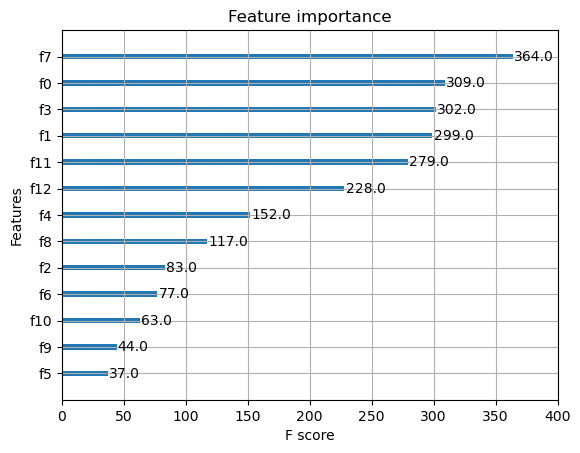

In [15]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Assuming best model from GridSearchCV
plot_importance(grid_search.best_estimator_)
plt.savefig('feature_importance.png')
plt.show()
